**Clicked Advanced Machine Learning: Multi-linear Regression**

In [4]:
#import libraries--may not use all of them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

import patsy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

**Import Data**

In [5]:
data = "/content/ClickedDemostration_PredictiveAnalytics.csv"
#column_names = ['Car_Make', 'Year', 'Selling_Price (in 000s)', 'Present_Price  (in 000s)', 'KM_Driven',
               # 'Fuel_Type', 'Fuel_Type_Category', 'Seller_Type', 'Seller_Type_Category', 'Transmission'#
                #'Transmission_Category','Owner','Owner_Category']#

raw_dataset = pd.read_csv(data)

In [6]:
dataset = raw_dataset.copy()
dataset.head()

,Car_Make,Year,Selling_Price (in 000s),Present_Price (in 000s),KM_Driven,Fuel_Type,Fuel_Type_Category,Seller_Type,Seller_Type_Category,Transmission,Transmission_Category,Owner,Owner_Category
0,ritz,2014,3.35,5.59,27000,1,Petrol,1,Dealer,1,Manual,0,New
1,sx4,2013,4.75,9.54,43000,2,Diesel,1,Dealer,1,Manual,0,New
2,ciaz,2017,7.25,9.85,6900,1,Petrol,1,Dealer,1,Manual,0,New
3,wagon r,2011,2.85,4.15,5200,1,Petrol,1,Dealer,1,Manual,0,New
4,swift,2014,4.60,6.87,42450,2,Diesel,1,Dealer,1,Manual,0,New


**Check for NA Values and Drop if Need Be**

In [7]:
dataset.isna().sum()


Car_Make                    0
Year                        0
Selling_Price (in 000s)     0
Present_Price  (in 000s)    0
KM_Driven                   0
Fuel_Type                   0
Fuel_Type_Category          0
Seller_Type                 0
Seller_Type_Category        0
Transmission                0
Transmission_Category       0
Owner                       0
Owner_Category              0
dtype: int64

In [8]:
dataset = dataset.dropna()

**One hot encoding**


In [9]:
#Create category maps--done separately since each is a different dictionary
dataset['Seller_Type_Category'] = dataset['Seller_Type_Category'].map({1: 'Dealer', 2: 'Individual'})
dataset['Transmission_Category'] = dataset['Transmission_Category'].map({1: 'Manual', 2: 'Automatic'})
dataset['Fuel_Type_Category'] = dataset['Fuel_Type_Category'].map({1: 'Petrol', 2: 'Diesel', 3: 'CNG'})
dataset['Owner_Category'] = dataset['Owner_Category'].map({0: 'New', 1: 'One', 2: 'Two', 3: 'Three'})

In [10]:
#One hot encode variables
dataset = pd.get_dummies(dataset, columns=['Seller_Type_Category', 'Transmission_Category',
                                           'Fuel_Type_Category', 'Owner_Category'], prefix='', prefix_sep='')

**Create Training and Test Dataset**

In [61]:
train_dataset=dataset.copy
train_dataset = train_dataset()
test_dataset=dataset.copy
test_dataset = test_dataset()

**Inspect data**



In [51]:
#Check for non-numerical information and convert to categorical data
check_non_numerical_columns=[train_dataset, test_dataset]

def check_non_numerical_columns(datasets):
  for dataset in datasets:
    for column in dataset.columns:
      if train_dataset[column].dtype == 'object':
        print(f"Non-numerical data found in column: {column}")
        print(train_dataset[column].unique())# Added and will test
        print()

In [62]:
#Update columns to categorical
train_dataset['Car_Make'] = train_dataset['Car_Make'].astype('category')
test_dataset['Car_Make'] = test_dataset['Car_Make'].astype('category')

**Car_Make and ANOVA**

In [41]:
# Create train_anova dataset to ensure data integrity
def train_anova(train_dataset):
  anova_data = train_dataset[['Car_Make', 'Selling_Price (in 000s)']].copy()
  anova_data.rename(columns={'Selling_Price (in 000s)': 'Selling_Price_in_000s'}, inplace=True)
  return anova_data

  anova_data = train_anova(train_dataset)


In [42]:
# Fit an ANOVA model to determine if strong relation btw Car_Make and Price
anova_data = train_anova(train_dataset)
anova_model = ols('Selling_Price_in_000s ~ C(Car_Make)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=1)

# Print the ANOVA table
print(anova_table)

                 df        sum_sq    mean_sq        F        PR(>F)
C(Car_Make)    97.0   5899.279144  60.817311  3.22554  4.989009e-23
Residual     3202.0  60373.465404  18.854924      NaN           NaN


In [103]:
#Drop Car_Make from datasets
train_dataset = train_dataset.drop(columns=['Car_Make'])
test_dataset = test_dataset.drop(columns=['Car_Make'])

**Build Decision Tree and Logistical Regression**

In [66]:
#Prepocess data
X = train_dataset.drop('Seller_Type',axis=1)
y = train_dataset['Seller_Type']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
#Create and Train Tree
clf = DecisionTreeClassifier(max_depth=3)  # Customize parameters later (e.g., max_depth)
clf = clf.fit(X_train, y_train)

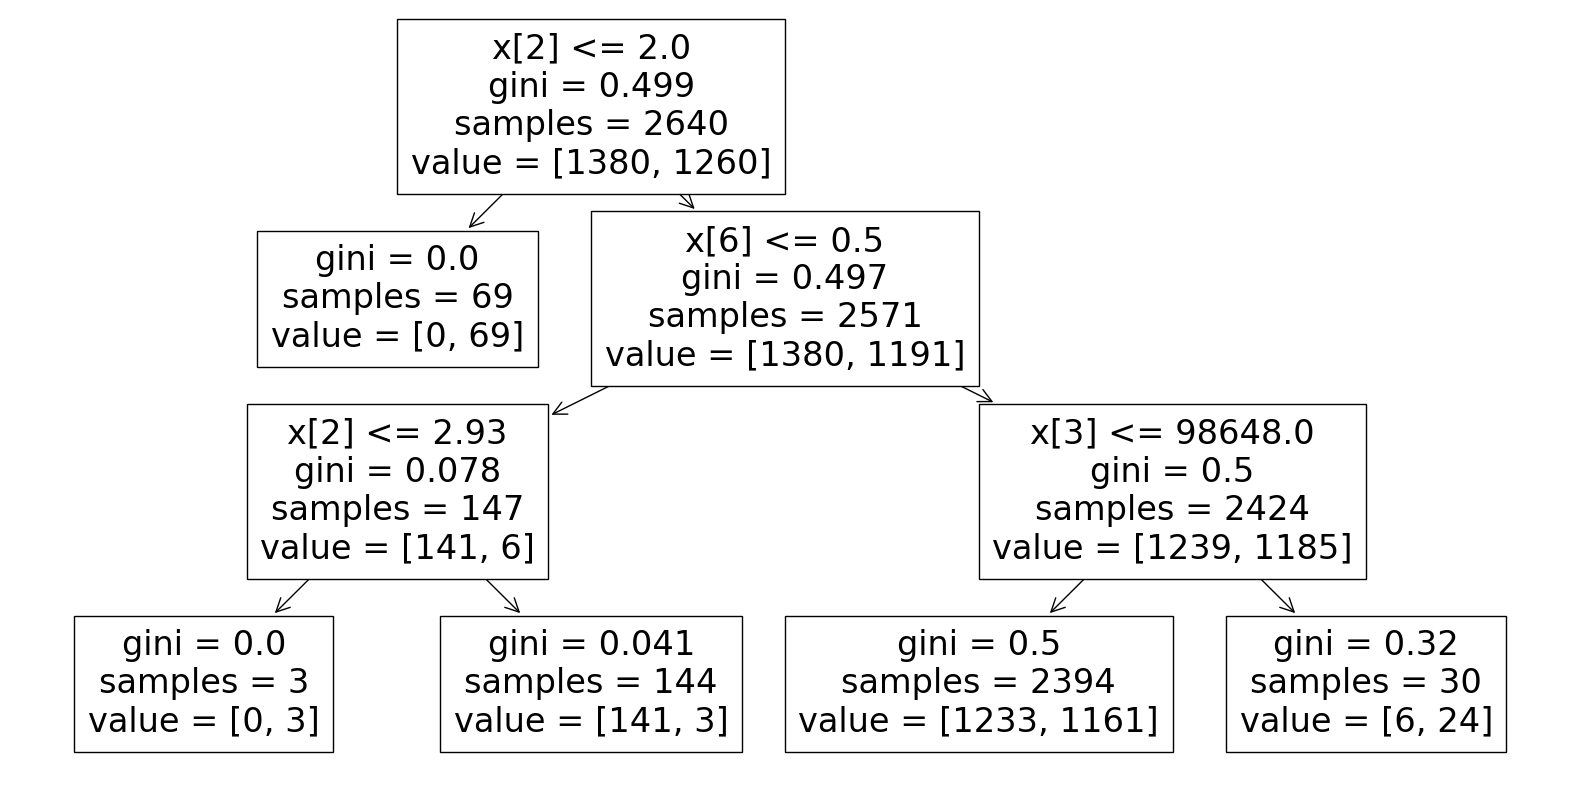

In [81]:
#Visualize results
plt.figure(figsize=(20,10))  # Adjust figsize if needed
tree.plot_tree(clf)
plt.show()

In [79]:
#Feature importance
feature_importances = clf.feature_importances_
most_important_features = np.argsort(feature_importances)[::-1]  # Indices of most important features first

# Example: Print top features
for i in range(5):
    print(X.columns[most_important_features[i]], feature_importances[most_important_features[i]])

KM_Driven 0.31805636382203717
Present_Price  (in 000s) 0.1974743747951443
Selling_Price (in 000s) 0.19415055922091942
Year 0.13210160375144142
Owner 0.06887011777030629


**Logistical Model**

In [82]:
#Create Logistic Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicted probabilities
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Predictions (using a threshold of 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions

In [ ]:
#Get Coefficients and intercepts
coefficients = logistic_model.coef_[0]  # Assuming binary classification
intercept = logistic_model.intercept_[0]

# Get features
feature_names = X_train.columns

# Construct the Equation using Logistic Sigmoid (log_odds)
equation = f"Log-odds(Target = 1) = {intercept:.2f} "
for i, coeff in enumerate(coefficients):
    sign = "+" if coeff >= 0 else "-"
    equation += f" {sign} {abs(coeff):.2f} * {feature_names[i]} "

def logistic_sigmoid(log_odds):
    return 1 / (1 + np.exp(-log_odds))
#Calculate the log-odds for all data points
log_odds = intercept + np.dot(X_test.values, coefficients)

# Calculate probabilities
probabilities = logistic_sigmoid(log_odds)

print(probabilities)

In [83]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.17424242424242425
Confusion Matrix:
 [[  0   0   0]
 [231 115   0]
 [199 115   0]]
ROC-AUC Score: 0.5378852030484886


**START OF MULTI-LINEAR SECTION--Additional Data Review: Joint Distribution and Multi-collinearity**

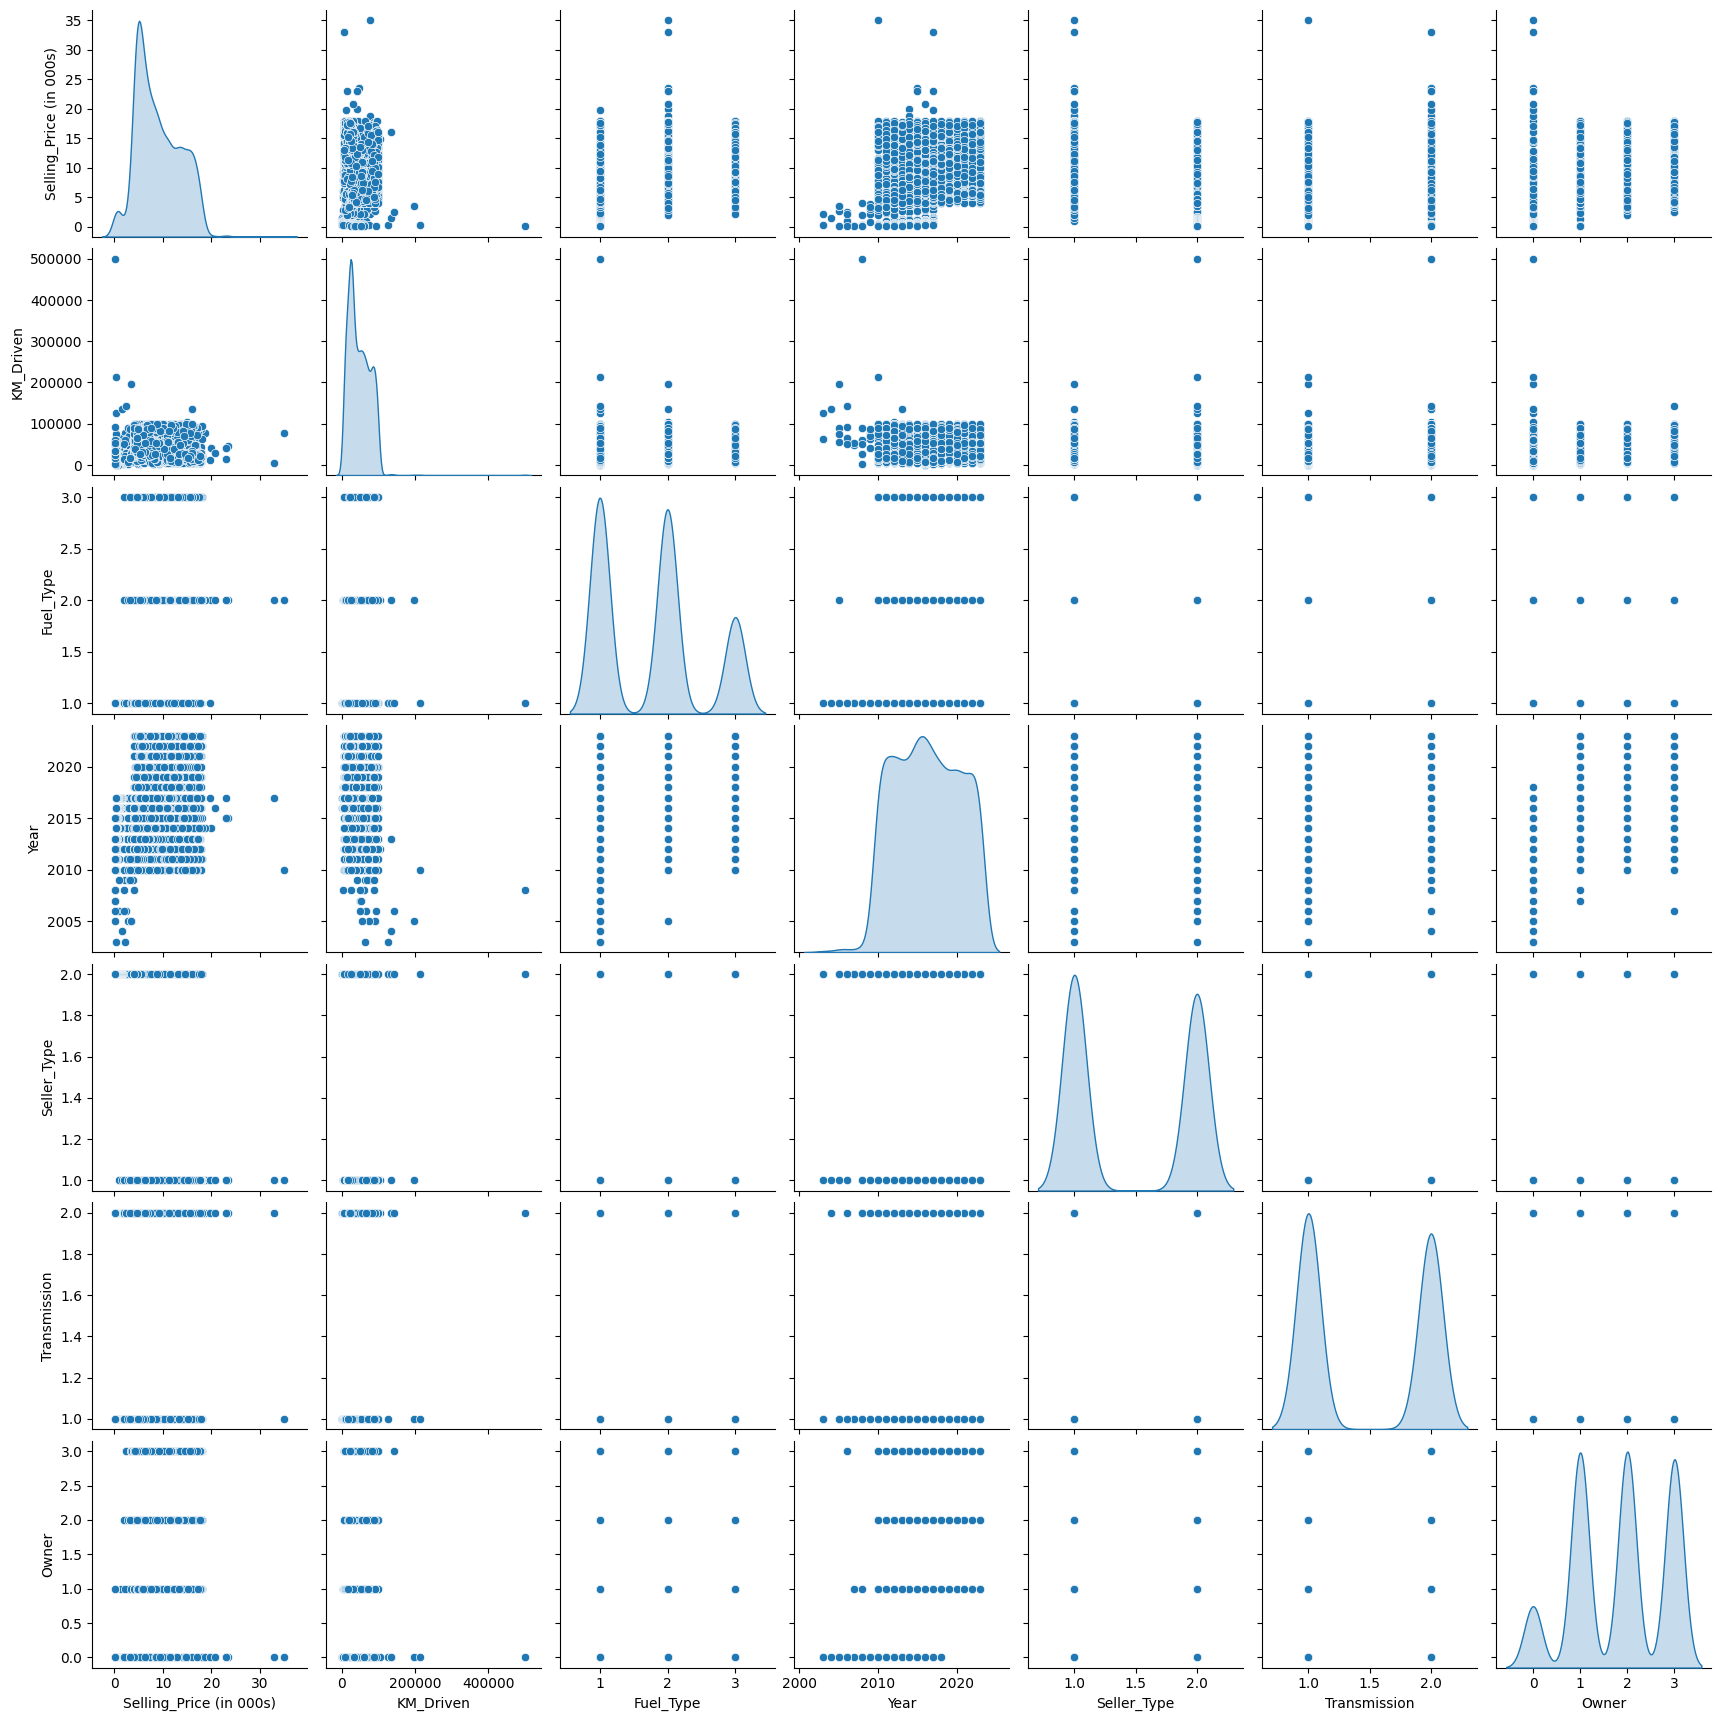

In [92]:
#Review joint distribution
sns.pairplot(train_dataset[['Selling_Price (in 000s)', 'KM_Driven', 'Fuel_Type', 'Year', 'Seller_Type',
                            'Transmission','Owner']], diag_kind='kde')
plt.show()


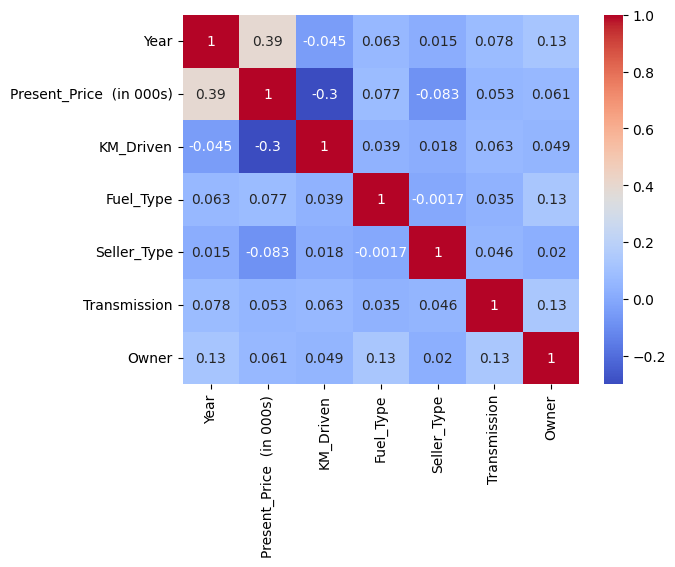

In [93]:
#Check for multi-collinearity
train_dataset.describe().transpose()
def plot_correlation_matrix(train_dataset,exclude_columns=['Selling_Price (in 000s)']):
  corr_matrix = train_dataset.drop(exclude_columns, axis=1).corr()
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.show()

plot_correlation_matrix(train_dataset)

**Split data into test, validation, and training sets**

In [108]:
# Split into training and testing sets--80/20
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#Drop Car_Make
train_dataset = train_dataset.drop(columns=['Car_Make'])
test_dataset = test_dataset.drop(columns=['Car_Make'])
'''
Split the training set again into training and validation sets (e.g., 70/30 split)
train_dataset, val_dataset = train_dataset.sample(frac=0.7, random_state=0).reset_index(drop=True),
train_dataset.drop(train_dataset.index).reset_index(drop=True)
'''

'\nSplit the training set again into training and validation sets (e.g., 70/30 split)\ntrain_dataset, val_dataset = train_dataset.sample(frac=0.7, random_state=0).reset_index(drop=True),\ntrain_dataset.drop(train_dataset.index).reset_index(drop=True)\n'

In [109]:
#Review the training and test set
train_dataset.head()

,Year,Selling_Price (in 000s),Present_Price (in 000s),KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
587,2011,17.1,16.70,17904,3,1,1,3
33,2014,6.0,9.95,45000,2,1,1,0
891,2023,17.3,15.90,80350,2,2,2,1
3085,2022,5.5,5.30,52914,1,2,1,2
1148,2022,17.8,18.50,29409,1,2,2,3


**Split features from labels**

In [110]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Selling_Price (in 000s)')
test_labels = test_features.pop('Selling_Price (in 000s)')

**Normalize the data**

In [111]:
#Create normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

#Normalize the data by fitting to the preprocessing layer
normalizer.adapt(np.array(train_features))

#Calculate the mean and variance, and store them in the layer:
print(normalizer.mean.numpy())

#When called, will produce input data with all features independently normalized
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())



[[2.0162753e+03 8.8176193e+00 4.6430844e+04 1.7662880e+00 1.4784092e+00
  1.4772729e+00 1.8094698e+00]]
First example: [[ 2011.     16.7 17904.      3.      1.      1.      3. ]]

Normalized: [[-1.29  1.72 -0.98  1.66 -0.96 -0.96  1.24]]


**Build Multi-Linear Regression**

In [112]:
#Review shape of all printouts
print("train_features shape:", train_features.shape)
print("train_labels shape:", train_labels.shape)
print("test_features shape:", test_features.shape)
print("test_labels shape:", test_labels.shape)

train_features shape: (2640, 7)
train_labels shape: (2640,)
test_features shape: (660, 7)
test_labels shape: (660,)


In [113]:
#First, build and train multi-linear model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1),
    #layers.Input(shape=(7,))#
])

#Call model.predict
linear_model.predict(train_features[:9])

#Confirm kernal weights--should be (8,1)
linear_model.layers[1].kernel

#Compile the model
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

#%%time#
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=50,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



1/1 [==============================] - 0s 100ms/step


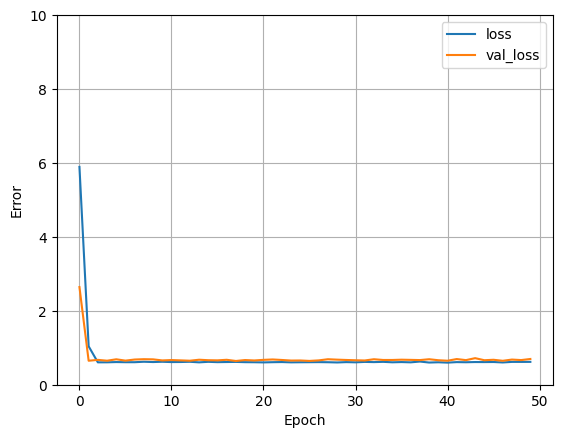

In [114]:
#Plot loss history
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [115]:
#Collect Results

#print(plot_model(linear_model))
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

print(test_results)

{'linear_model': 0.6789587140083313}


In [117]:
#Show linear_model equation

#Get weights (coefficients)
coefficients = linear_model.layers[1].kernel.numpy().flatten()
#print(coefficients)


#Get bias (intercept)
intercept = linear_model.layers[1].bias.numpy()
#print(intercept)

#Get number of features
num_features = train_features.shape[1]
#print(num_features)

#Construct Equation
def model_equation(coefficients, intercept, train_features, num_features):
  equation = f"Predicted_Value = {intercept[0]:.2f} "  # Adjust formatting as needed
  for i in range(num_features):
    sign = "+" if coefficients[i] >= 0 else "-"
    equation += f" {sign} {abs(coefficients[i]):.2f} * {train_features.columns[i]} "
  #print("Equation:", equation)
  return equation

result = model_equation(coefficients, intercept, train_features, num_features)
print(result)


Predicted_Value = 9.20  + 0.11 * Year  + 4.32 * Present_Price  (in 000s)  + 0.17 * KM_Driven  + 0.08 * Fuel_Type  + 0.09 * Seller_Type  - 0.14 * Transmission  + 0.10 * Owner 


In [118]:
#Check features and label shape
print(f"test_features shape: {test_features.shape}")
print(f"test_labels shape: {test_labels.shape}")

test_features shape: (660, 7)
test_labels shape: (660,)


**BONUS: MultiLinear Regression with Deep Neural Network--MUST RUN MULTI-LINEAR SECTION FIRST**

In [119]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [120]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

##%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 7)                 15        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4752 (18.57 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________


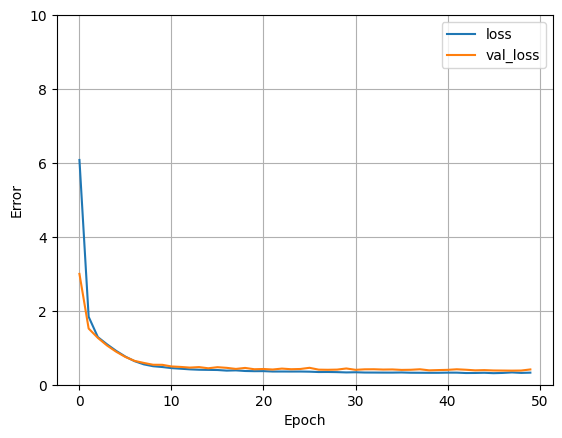

In [121]:
#Plot loss history
plot_loss(history)

In [122]:
#Collect results
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

**Performance**

In [123]:
#Review Linear vs. DNN Model
pd.DataFrame(test_results,
             index=['Mean absolute error [Selling_Price (in 000s)]']).T

,Mean absolute error [Selling_Price (in 000s)]
linear_model,0.678959
dnn_model,0.440799


**Make Predictions and review the model**

21/21 [==============================] - 0s 4ms/step


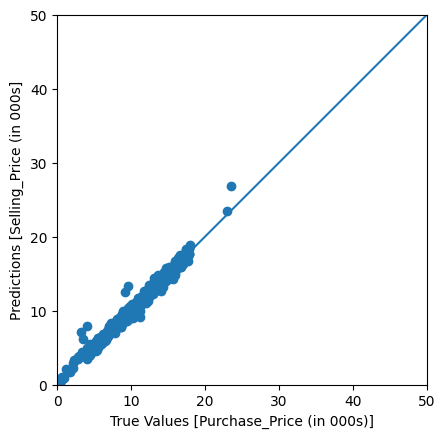

In [124]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Purchase_Price (in 000s)]')
plt.ylabel('Predictions [Selling_Price (in 000s]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

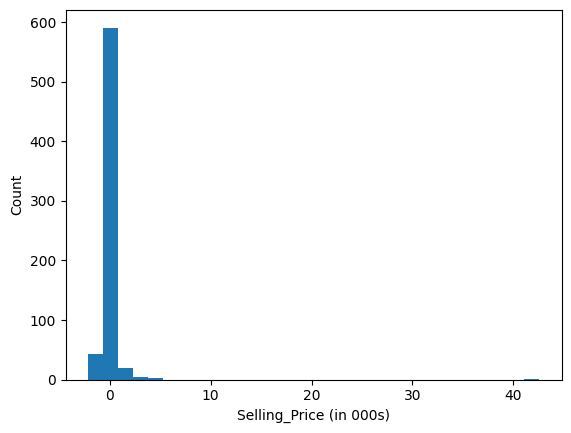

In [125]:
#View error terms
error = test_predictions - test_labels
plt.hist(error, bins=30)
plt.xlabel('Selling_Price (in 000s)')
_ = plt.ylabel('Count')

In [126]:
#Save model
dnn_model.save('dnn_model.keras')

In [127]:
#Review results
pd.DataFrame(test_results, index=['Selling_Price (in 000s)']).T

,Selling_Price (in 000s)
linear_model,0.678959
dnn_model,0.440799
